In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import auc, roc_curve

In [3]:
data = pd.read_csv("data/winequality-white.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Variables selection

In [4]:
X = data.iloc[:,:-1]
X.shape

(4898, 11)

In [5]:
y = data['quality']
y.shape

(4898,)

In [6]:
# convert to binary problem
y_bin = np.where(y<6, 0, 1)

## Variables standardization

not required for those algorithms

## Split the data 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.25, random_state=0)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3673, 11), (1225, 11), (3673,), (1225,))

# Bagging

In [10]:
from sklearn.ensemble import BaggingClassifier

In [109]:
bg_cls = BaggingClassifier(n_estimators=500, random_state=0, max_features=10, n_jobs=-1)

In [110]:
bg_cls.fit(X_train, y_train)

BaggingClassifier(max_features=10, n_estimators=500, n_jobs=-1, random_state=0)

### Predict

In [80]:
y_pred_bg = bg_cls.predict_proba(X_test)[:,1]

### Evaluate

In [81]:
print(f"Accuracy: {bg_cls.score(X_test, y_test)*100.0:.2f}%")

Accuracy: 82.12%


In [82]:
fpr_bg, tpr_bg, thresholds_bg = roc_curve(y_test, y_pred_bg)
print(f"ROC AUC: {auc(fpr_bg, tpr_bg)*100.0:.2f}%")

ROC AUC: 89.60%


### Get the estimators

In [16]:
estimators = bg_cls.estimators_

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rf_cls = RandomForestClassifier(n_estimators=500, max_features=5, max_depth=6, random_state=0, n_jobs=-1)

In [122]:
rf_cls.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=5, n_estimators=500, n_jobs=-1,
                       random_state=0)

### Predict

In [123]:
y_pred_rf = rf_cls.predict_proba(X_test)[:,1]

### Evaluate

In [124]:
print(f"Accuracy: {rf_cls.score(X_test, y_test)*100.0:.2f}%")

Accuracy: 75.51%


In [125]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
print(f"ROC AUC: {auc(fpr_rf, tpr_rf)*100.0:.2f}%")

ROC AUC: 83.30%


### Get the estimators

In [24]:
estimators = rf_cls.estimators_

# AdaBoost

In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
ad_cls = AdaBoostClassifier(n_estimators=500, random_state=0, learning_rate=0.5)

In [74]:
ad_cls.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=500, random_state=0)

### Predict

In [75]:
y_pred_ad = ad_cls.predict_proba(X_test)[:,1]

### Evaluate

In [76]:
print(f"Accuracy: {ad_cls.score(X_test, y_test)*100.0:.2f}%")

Accuracy: 75.92%


In [77]:
fpr_ad, tpr_ad, thresholds_ad = roc_curve(y_test, y_pred_ad)
print(f"ROC AUC: {auc(fpr_ad, tpr_ad)*100.0:.2f}%")

ROC AUC: 82.14%


### Get the estimators

In [31]:
estimators = rf_cls.estimators_

# Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [145]:
gb_cls = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_features=None, max_depth=6, random_state=0)

In [146]:
gb_cls.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=6, n_estimators=500,
                           random_state=0)

### Predict

In [147]:
y_pred_gb = gb_cls.predict_proba(X_test)[:,1]

### Evaluate

In [148]:
print(f"Accuracy: {gb_cls.score(X_test, y_test)*100.0:.2f}%")

Accuracy: 82.20%


In [149]:
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_gb)
print(f"ROC AUC: {auc(fpr_gb, tpr_gb)*100.0:.2f}%")

ROC AUC: 88.21%


### Get the estimators

In [38]:
estimators = rf_cls.estimators_

# XGBoost

In [39]:
import xgboost as xgb

In [154]:
xb_cls = xgb.XGBClassifier(n_estimators = 500, use_label_encoder=False, eval_metric='auc')

In [155]:
xb_cls.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

### Predict

In [156]:
y_pred_xb = xb_cls.predict_proba(X_test)[:,1]

### Evaluate

In [157]:
print(f"Accuracy: {xb_cls.score(X_test, y_test)*100.0:.2f}%")

Accuracy: 80.57%


In [158]:
fpr_xb, tpr_xb, thresholds_xb = roc_curve(y_test, y_pred_xb)
print(f"ROC AUC: {auc(fpr_xb, tpr_xb)*100.0:.2f}%")

ROC AUC: 87.47%


# XGBoost Random Forest

In [45]:
import xgboost as xgb

In [46]:
xbrf_cls = xgb.XGBRFClassifier(eval_metric='auc', n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [47]:
xbrf_cls.fit(X_train, y_train)

/home/valkea/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, eval_metric='auc',
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', max_delta_step=0, max_depth=1,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=8, num_parallel_tree=100,
                objective='binary:logistic', predictor='auto', random_state=0,
                reg_alpha=0, scale_pos_weight=1, tree_method='exact',
                validate_parameters=1, verbosity=None)

### Predict

In [150]:
y_pred_xbrf = xbrf_cls.predict_proba(X_test)[:,1]

### Evaluate

In [151]:
print(f"Accuracy: {xbrf_cls.score(X_test, y_test)*100.0:.2f}%")

Accuracy: 64.00%


In [152]:
fpr_xbrf, tpr_xbrf, thresholds_xbrf = roc_curve(y_test, y_pred_xbrf)
print(f"ROC AUC: {auc(fpr_xbrf, tpr_xbrf)*100.0:.2f}%")

ROC AUC: 74.00%


## ROC Curves comparison WITHOUT Hyper-parameter tuning (no grid search)

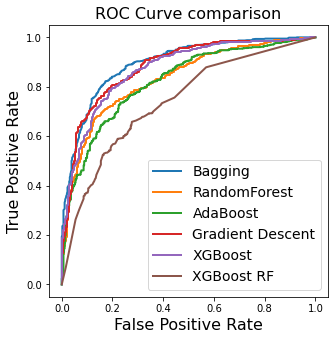

In [153]:
fig = plt.figure(figsize=(5, 5))

plt.plot(fpr_bg, tpr_bg, '-', lw=2, label=f"Bagging")
plt.plot(fpr_rf, tpr_rf, '-', lw=2, label=f"RandomForest")
plt.plot(fpr_ad, tpr_ad, '-', lw=2, label=f"AdaBoost")
plt.plot(fpr_gb, tpr_gb, '-', lw=2, label=f"Gradient Descent")
plt.plot(fpr_xb, tpr_xb, '-', lw=2, label=f"XGBoost")
plt.plot(fpr_xbrf, tpr_xbrf, '-', lw=2, label=f"XGBoost RF")
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve comparison', fontsize=16)
plt.legend(loc="lower right", fontsize=14)